In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import langconv

In [2]:
fname = '/python/datasource/sqlResult_1558435.csv'

In [3]:
news = pd.read_csv(fname, encoding = 'gb18030')
len(news)

89611

In [5]:
news.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [6]:
news['cut_content'] = ''

#### 切词

In [8]:
cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model')  # 分词模型路径，模型名称为`cws.model`
from pyltp import Segmentor

In [9]:
segmentor = Segmentor()  # 初始化实例
segmentor.load(cws_model_path)  # 加载模型
content_id = []
content_source = []
content_source_ = []
content_text = []
for i, content in enumerate(news['content']):    
    id, source, news_content = news['id'][i], news['source'][i], news['content'][i]
    text = str(news_content)
    text = text.strip()
    if not text: continue
    text = langconv.Converter('zh-hans').convert(text)
    text = ''.join(re.findall(r'[^\\n]', text))
    text = ''.join(re.findall(r'[\d|\w]+',text))
    text = ' '.join(segmentor.segment(text))
    content_id.append(id)    
    content_text.append(text)
    content_source.append(source)
    if i % 2000 ==0:
        print('Saved ' + str(i) + ' lines')    
segmentor.release()  # 释放模型

Saved 0 lines
Saved 2000 lines
Saved 4000 lines
Saved 6000 lines
Saved 8000 lines
Saved 10000 lines
Saved 12000 lines
Saved 14000 lines
Saved 16000 lines
Saved 18000 lines
Saved 20000 lines
Saved 22000 lines
Saved 24000 lines
Saved 26000 lines
Saved 28000 lines
Saved 30000 lines
Saved 32000 lines
Saved 34000 lines
Saved 36000 lines
Saved 38000 lines
Saved 40000 lines
Saved 42000 lines
Saved 44000 lines
Saved 46000 lines
Saved 48000 lines
Saved 50000 lines
Saved 52000 lines
Saved 54000 lines
Saved 56000 lines
Saved 58000 lines
Saved 60000 lines
Saved 62000 lines
Saved 64000 lines
Saved 66000 lines
Saved 68000 lines
Saved 70000 lines
Saved 72000 lines
Saved 74000 lines
Saved 76000 lines
Saved 78000 lines
Saved 80000 lines
Saved 82000 lines
Saved 84000 lines
Saved 86000 lines
Saved 88000 lines


In [10]:
content_text[0]

'此外 自 本周 6月 12日 起 除 小米 手机 6 等 15 款 机型 外 其 馀 机型 已 暂停 更新 发布 含 开发 版 体验 版 内测 稳定 版 暂 不 受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统 优化 工作 有人 猜测 这 也 是 将 精力 主要 用 到 MIUI9 的 研发 之中 MIUI8 去年 5月 发布 距 今 已 有 一 年 有 馀 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方 消息'

#### 保存切词后的文件

In [21]:
cutFile = '/python/datasource/project/cutResult.csv'

#### 保存切词后的文件

In [16]:
data = pd.DataFrame({'id':content_id, 'source':content_source, 'content':content_text})
data.to_csv(cutFile,encoding = 'utf-8')

#### 加载切词后的文件

In [17]:
cut_content = pd.read_csv(cutFile, encoding = 'utf8')
cut_content = cut_content.loc[:, ~cut_content.columns.str.contains('^Unnamed')]

for c in cut_content:
    print(c)

id
source
content


In [18]:
cut_content = cut_content.fillna(' ')

In [19]:
len(cut_content)

89611

In [20]:
cut_content.head()

,id,source,content
0,89617,快科技@http://www.kkj.cn/,此外 自 本周 6月 12日 起 除 小米 手机 6 等 15 款 机型 外 其 馀 机型 ...
1,89616,快科技@http://www.kkj.cn/,骁龙 835 作为 唯一 通过 Widows10 桌面 平台 认证 的 ARM 处理器 高通...
2,89615,快科技@http://www.kkj.cn/,此前 的 一 加 3T 搭载 的 是 3400mAh 电池 DashCharge 快 充 规...
3,89614,新华社,这 是 6月 18日 在 葡萄牙 中部 大佩德罗冈 地区 拍摄 的 被 森林 大火 烧毁 的...
4,89613,深圳大件事,原 标题 44 岁 女子 跑 深圳 约会 网友 被 拒暴雨 中 裸身 奔走 深圳 交警 微博...


In [6]:
import re
import os
LTP_DATA_DIR = '/python/datasource/ltp_data_v3.4.0'  # ltp模型目录的路径

from pyltp import SentenceSplitter

cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model')  # 分词模型路径，模型名称为`cws.model`
from pyltp import Segmentor
segmentor = Segmentor()  # 初始化实例
segmentor.load(cws_model_path)  # 加载模型

pos_model_path = os.path.join(LTP_DATA_DIR, 'pos.model')  # 词性标注模型路径，模型名称为`pos.model`
from pyltp import Postagger
postagger = Postagger() # 初始化实例
postagger.load(pos_model_path)  # 加载模型

ner_model_path = os.path.join(LTP_DATA_DIR, 'ner.model')  # 命名实体识别模型路径，模型名称为`pos.model`
from pyltp import NamedEntityRecognizer
recognizer = NamedEntityRecognizer() # 初始化实例
recognizer.load(ner_model_path)  # 加载模型

par_model_path = os.path.join(LTP_DATA_DIR, 'parser.model')  # 依存句法分析模型路径，模型名称为`parser.model`
from pyltp import Parser
parser = Parser() # 初始化实例
parser.load(par_model_path)  # 加载模型
postags = ['nh', 'r', 'r', 'v']     


In [118]:
key_word = set(['说','表示', '告诉', '认为', '指出', '坦言', '看来', '称', '介绍',  '透露', '强调',  '写道', '话', '建议',  '问', '提到', '声称', '称赞', '深有体会', '道', '设想', '直言', '解释', '称', '相信', '呼吁', '担心', '写信给', '深知', '在我看来', '证实', '眼中', '宣称', '清楚', '还称', '回答',  '估计', '来说','承认', '觉得', '特别强调',  '毫不讳言',  '坚信', '提及', '非常重视', '谈到', '申明', '感慨', '普遍认为','表明', '看法', '援引', '供词',  '知晓',  '批评','想法',  '描述', '重申','告诫', '指责',  '坦承','李锦说', '如是说', '敦促', '表态', '断定', '理解', '坚称',  '提醒'])

In [183]:
def cut(text):
    cut_text = []
    for t in text:
        t = t.strip()
        if not t: continue                
        words = segmentor.segment(t)
        cut_text.append(' '.join(words))
    return cut_text
def sentence_spliter(text):
    sents = []
    for s in SentenceSplitter.split(text):
        s = s.strip()
        if not s: continue
        sents.append(s)
    return sents

class NewsExtract():
    def __init__(self):        
        self.text = []
        self.sentences = []
        self.cut_text = []
        self.peoples = []
        self.viewpoints = {}
    def preprocessing(self, text):
        text = text.strip()
        if not text: 
            self.text = []
            self.sentences = []
            self.cut_text = []
            return 
        self.text = text  
        self.sentences = sentence_spliter(self.text)
        self.cut_text = cut(self.sentences)
        self.get_ner()
    def get_ner(self):
        self.peoples = []
        for i, s in enumerate(self.cut_text):
            s = s.split()
            sen_set = set(s)
            inter_set = sen_set & key_word
            if not inter_set: continue
            print(inter_set)
            postags = postagger.postag(s)
            netags = ' '.join(recognizer.recognize(s, postags))
            for tag, word in zip(netags.split(), s):
                if tag == 'S-Nh':
                    self.peoples.append(word)
                    if word not in self.viewpoints: self.viewpoints[word] = []
                    self.viewpoints[word].append((i,self.sentences[i]))    
    def get_viewpoints(self):        
        return self.viewpoints

In [103]:
sentence='''据巴西《环球报》7日报道，巴西总统博索纳罗当天签署行政法令，放宽枪支进口限制，并增加民众可购买弹药的数量。\r\n《环球报》称，该法令最初的目的是放松对收藏家与猎人的限制，但现在扩大到其他条款。新法令将普通公民购买枪支的弹药数量上限提高至每年5000发，此前这一上限是每年50发。博索纳罗在法令签署仪式上称，“我们打破了垄断”“你们以前不能进口，但现在这些都结束了”。另据法新社报道，当天在首都巴西利亚的一次集会上，博索纳罗还表示，“我一直说，公共安全从家里开始的。”\r\n这不是巴西第一次放宽枪支限制。今年1月，博索纳罗上台后第15天就签署了放宽公民持枪的法令。根据该法令，希望拥有枪支的公民须向联邦警察提交申请，通过审核者可以在其住宅内装备最多4把枪支，枪支登记有效期由5年延长到10年。《环球报》称，博索纳罗在1月的电视讲话中称，要让“好人”更容易持有枪支。“人民希望购买武器和弹药，现在我们不能对人民想要的东西说不”。\r\n2004年，巴西政府曾颁布禁枪法令，但由于多数民众反对，禁令被次年的全民公投否决。博索纳罗在参加总统竞选时就表示，要进一步放开枪支持有和携带条件。他认为，放宽枪支管制，目的是为了“威慑猖狂的犯罪行为”。资料显示，2017年，巴西发生约6.4万起谋杀案，几乎每10万居民中就有31人被杀。是全球除战争地区外最危险的国家之一。\r\n不过，“以枪制暴”的政策引发不少争议。巴西《圣保罗页报》称，根据巴西民调机构Datafolha此前发布的一项调查，61%的受访者认为应该禁止持有枪支。巴西应用经济研究所研究员塞奎拉称，枪支供应增加1%，将使谋杀率提高2%。1月底，巴西民众集体向圣保罗联邦法院提出诉讼，质疑博索纳罗签署的放宽枪支管制法令。\r\n巴西新闻网站“Exame”称，博索纳罗7日签署的法案同样受到不少批评。公共安全专家萨博称，新的法令扩大了少数人的特权，不利于保护整个社会。（向南）\r\n'''
sentence = ''.join(re.findall(r'[^\\n]', sentence))    

In [190]:
sentence = str(random.choice(news['content']))

if sentence:
    sentence = ''.join(re.findall(r'[^\\n\\u3000]', sentence))    
    # print('sentence:', sentence)
    news_extract = NewsExtract()
    news_extract.preprocessing(sentence)
    view = news_extract.get_viewpoints()  
    print('people, viewpoint')
    for k in view:
        print(k, view[k])

{'介绍'}
people, viewpoint
何平 [(0, '新华社北京４月４日电\u3000国家统计局工业司工业效益处处长何平近日介绍，今年１至２月份，我国规模以上工业企业利润率同比明显上升。')]


In [191]:
# sentence = ''.join(re.findall(r'[^\\n\\u3000]', sentence)) 
print(sentence)

　　新华社北京４月４日电　国家统计局工业司工业效益处处长何平近日介绍，今年１至２月份，我国规模以上工业企业利润率同比明显上升。企业主营业务收入利润率为５．９２％，同比上升０．８个百分点，升幅为２０１２年以来最大。（完）


In [5]:
segmentor.release()
postagger.release()  # 释放模型
recognizer.release()
parser.release()

In [54]:
def contents_process(text):
    postags = ['nh', 'r', 'r', 'v']
    text = str(text)
    text = text.strip()
    if not text: return
    text = langconv.Converter('zh-hans').convert(text)
    text = ''.join(re.findall(r'[^\\n]', text))
    print('text: ', text, '\n')
    sents = SentenceSplitter.split(text)#cut sententes
    for s in sents:
        s = s.strip()
        if not s: continue
        print(s, '\n')
        words = segmentor.segment(s)#cut words
        print('cut words: ',' '.join(words), '\n')
        postags = postagger.postag(words)#words attirbutes tag
        print('words attributes tag: ',' '.join(postags), '\n')
        netags = recognizer.recognize(words, postags)  # 命名实体识别
        print('name entity recognize: ','\t'.join(netags), '\n')
        arcs = parser.parse(words, postags)  # 句法分析
        print ('gramer analysis:',"\t".join("%d:%s" % (arc.head, arc.relation) for arc in arcs), '\n\n')

In [55]:
import random

In [56]:
content = random.choice(news['content'])
contents_process(content)

text:  新华社上海５月１７日电　题：快递企业集体上调派件费，你的快递会涨价吗？　　新华社“中国网事”记者何欣荣　　　５月中旬以来，关于圆通、中通、韵达等６家加盟制快递企业将从６月１日起提高网点派件费０．１５元／件的消息不断传出。记者询问圆通、韵达相关人士，确认消息属实。作为与百姓生活紧密关联的快递行业，派件费的上调将带来哪些影响？　　（小标题）会不会推高快递价格？　　何为派件费？其费率上调会不会推高快递价格？对于多数消费者来说，这是听到该消息的第一反应。　　一件快递从Ａ地的发货人寄到Ｂ地的收件人手中，过程大致分为“揽－运－派”三段。第一步是“揽”，由Ａ地的快递公司加盟网点完成；第二步为干线运输，由上市的快递公司总部组织运力完成；第三步就是“派”，由Ｂ地的快递公司加盟网点完成。在整个过程中，Ａ地网点收取的是快递费，付给总部的是面单费、干线运输费以及其他费用，负责最后一公里的Ｂ地网点拿到的是派件费。　　“按照行业惯例，这个派件费是由收件网点从快递费中支出。也就是说，派件费上调属于快递公司的内部结算机制调整，和快递价格并无直接关系。”中国快递协会原副秘书长、国邮智库专家邵钟林说。　　不过，消费者的担心也不无道理。“派件费提价，增加了整个快递链条的成本，理论上需要向下游客户传导，但目前行业竞争仍然激烈，下游电商客户仍较为强势，能否完全转嫁仍需要观察。”兴业证券研究员王品辉分析。　　同济大学知识产权与竞争法研究中心研究员刘旭表示，快递公司通常会与发件规模较大的商家签订长期合同，因此短期内应该不会影响这些商户的快递费用。但不排除在将来续签合同时，会提高快递费价码，并最终转嫁给消费者。　　（小标题）为何要提高派件费标准？　　快递公司为何要提高派件费标准？按照邵钟林的观察，通过内部结算机制的调整，可以平衡收件业务和派件业务之间的利益，进而稳住一些基层加盟网点。　　之所以会这样，是因为近年来随着电商朝着集中化、大型化的方向发展，快递行业的收件网点越来越集中到少数大型加盟商手中，而多数基层网点逐渐变成派件网点。因为快递利润的大头在收件，以派件为主的基层网点经营形势日趋艰难，快递员流失、快件积压、网点停运甚至关门的现象时有出现，影响了快递业的服务质量。　　一位圆通的魏姓快递员告诉记者，他的工作以派件为主，多的时候每天１００多单，每单１元至１．５元之间。如果派件费上调０．１５元／件，

cut words:  其实 ， 对于 快递 企业 来说 ， 如果 真的 要 借 上调 派件费 的 契机 来 提高 快递 价格 ， 是 一 件 非常 敏感 的 事情 。 

words attributes tag:  d wp p v n u wp c d v v v n u n v v v n wp v m q d a u n wp 

name entity recognize:  O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O 

gramer analysis: 11:ADV	1:WP	11:ADV	5:ATT	3:POB	3:RAD	3:WP	11:ADV	11:ADV	11:ADV	0:HED	13:ATT	15:ATT	13:RAD	11:VOB	17:ADV	11:COO	19:ATT	17:VOB	11:WP	11:COO	23:ATT	27:ATT	25:ADV	27:ATT	25:RAD	21:VOB	11:WP 


就在２０１６年１２月，广东省发改委对广东省惠东县５家快递公司协同涨价的行为处以６５万元的罚款。 

cut words:  就 在 ２０１６年 １２月 ， 广东省 发改委 对 广东省 惠东县 ５ 家 快递 公司 协同 涨价 的 行为 处 以 ６５万 元 的 罚款 。 

words attributes tag:  d p nt nt wp ns j p ns ns m q n n v v u n v p m q u n wp 

name entity recognize:  O	O	O	O	O	B-Ni	E-Ni	O	B-Ns	E-Ns	O	O	O	O	O	O	O	O	O	O	O	O	O	O	O 

gramer analysis: 2:ADV	19:ADV	4:ATT	2:POB	2:WP	7:ATT	16:SBV	16:ADV	10:ATT	14:ATT	12:ATT	14:ATT	14:ATT	8:POB	16:ADV	18:ATT	16:RAD	19:ATT	0:HED	19:CMP	22:ATT	24:ATT	22:RAD	20:POB	19:WP 


“商量着涨价是万万不行的，这是反垄断法的要义。” 

cut words:  “ 商量 着 涨价

In [5]:
segmentor.release()
postagger.release()  # 释放模型
recognizer.release()
parser.release()

#### 加载词向量

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
word2vec_file = '/python/datasource/project/news.word2vec'
model = Word2Vec.load(word2vec_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
import networkx as nx

In [13]:
import pandas as pd
fname = '/python/datasource/sqlResult_1558435.csv'
news = pd.read_csv(fname, encoding = 'gb18030')
len(news)

89611

#### 抽样，并进行数据清洗

In [35]:
import numpy as np
import re
import random
import jieba

In [ ]:
news_text = news['content']

In [14]:
choose_index = np.random.choice(range(len(news_text)), size=200)
# print(choose_index, end=' ')
text = [news_text[t] for t in choose_index]
# len(text)
text_clean = []
for t in text:
    news = str(t).strip()
    if not news: continue
    t = "".join(re.findall(r'[^\\n\r\n\u3000]',news))
    text_clean.append(t)
len(text_clean)
text_clean

['新华社照片，杜塞尔多夫，2017年6月3日（体育）（4）乒乓球——世乒赛男单：张继科无缘16强6月2日，张继科在比赛中发球。当日，在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛男单第三轮比赛中，中国选手张继科1比4不敌韩国选手李尚洙，无缘16强。新华社记者罗欢欢摄',
 '【新华社微特稿】日本宫城县浦安养老院里来了一个新员工——Teleoid机器人。它到来后，让养老院里多了不少欢声笑语。据日本共同社１６日报道，Teleoid由大阪大学研究人员开发，体重２.７公斤，身高５０厘米，除了一双黑色的眼睛外，脸部五官模糊不清。从外形看，它更像一个没有表情、看不出年纪和性别的小“幽灵”。可别小看这个小“幽灵”，它可是老人们与亲属联系的纽带。亲属与老人远程通话时，可以通过面前的麦克风和摄像机捕捉自己的声音与表情，实时传输给Teleoid，这样一来，Teleoid就可以边“传话”边做出跟亲属们差不多的表情，让老人们觉得好像亲人就在身边。养老院工作人员说，Teleoid到来后，一些平素古板、易怒的老人变得温和起来，那些患有严重老年痴呆症的老人甚至认为Teleoid就是一个“活人”。（完）（荆晶）关键词：浦安养老院（Urayasuelderlyursighome）',
 '从7735公里到2万多公里，我国高铁2012年以来运营里程翻了近两倍；一度被国外企业垄断的高铁列控系统等核心技术拿到了进军海外市场的“通行证”；具有完全自主知识产权的中国首条全自动运行系统线路――北京地铁燕房线，今年年底将正式开通试运营……这些核心技术的研发，都发生在丰台。2014年2月26日，习近平总书记视察北京，赋予北京“四个中心”，“全国科技创新中心”成为北京新的定位之一。中关村丰台园聚集了知名轨道交通企业133家。如何打出一手“高大上”的科技牌？计划经济时代，中铁、中车等传统铁道相关企业就在丰台布局，利用这一优势，丰台区将轨道交通作为重点发展产业，另一方面，从专业服务、搭建共性平台、资金支持等多方面提供扶持。如今，丰台区轨道交通产业聚集了中车集团、中国中铁、中国通号等全球知名龙头企业和民营企业133家，从科技研发、产品设计，到轨道施工、场站建设、车辆制造，再到运营调度、场站管理……在轨道交通全产业链上，每个环节都没有落下。与此同时，作为北京市国防和军队科研院所最集中的地区，丰台建立了军民科技协同创新孵化

In [31]:
paragraph = random.choice(text_clean)
sentences = re.split('。|！|\!|\.|？|\?',paragraph)
new_sents = []
for i in range(int(len(sentences)/2)):
    sent = sentences[2*i] + sentences[2*i+1]
    new_sents.append(sent)
new_sents

['新华社莫斯科５月９日电（记者栾海安晓萌）俄罗斯首都莫斯科红场９日举行阅兵式，庆祝卫国战争胜利７２周年莫斯科时间上午１０时，阅兵式正式开始',
 '仪仗队护卫俄罗斯国旗和胜利旗帜在《神圣的战争》乐曲伴奏下走进红场，受阅官兵以及观礼台上的卫国战争老战士们纷纷向旗帜致以军礼俄罗斯国防部长绍伊古乘车绕红场一周',
 '随后，俄罗斯总统普京在观礼台上发表致辞说，苏联人民付出了沉重的代价将法西斯赶出自己的家园今天，人民永远不会忘记，正是他们祖辈、父辈的殊死斗争换来了欧洲的解放与当今的持久和平',
 '普京指出，当今世界反恐怖主义、反分裂主义、反新纳粹主义等斗争日渐激烈，这要求国际社会必须团结在一起应对威胁俄罗斯永远致力于维护世界和平，愿意与所有热爱和平的国家展开平等的合作',
 '普京讲话后，来自俄罗斯陆军、海军、空军、空降兵、联邦安全局等约１万名官兵分成２７个徒步方队通过红场，紧随其后的是以二战著名坦克Ｔ－３４引领的近１１４台现代化军事装备不过因天气原因，原定的飞行表演并没有进行',
 '阅兵式结束后，普京及随行人员向亚历山大花园的无名烈士墓敬献了花圈除莫斯科之外，圣彼得堡、伏尔加格勒、摩尔曼斯克等２５个俄罗斯城市也举行了活动庆祝胜利日',
 '１９４５年５月８日当地时间午夜，法西斯德国在柏林郊区的卡尔斯霍斯特正式签署无条件投降书此时，地处柏林以东的苏联已是５月９日凌晨',
 '苏联将５月９日定为“卫国战争胜利日”苏联解体后，独联体国家沿袭了这一传统',
 '现在，“卫国战争胜利日”是俄罗斯最隆重的节日之一（完）']

#### 切词

In [36]:
cut_sents = []
for s in new_sents:
    sent = []
    cut_text = jieba.cut(s)
    for t in cut_text:
        t = "".join(re.findall(r'[\d|\w]+',t))
        t = t.strip()
        if not t: continue
        sent.append(t)
    cut_sents.append(sent)
len(cut_sents)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.808 seconds.
Prefix dict has been built succesfully.


9

#### 句向量

In [37]:
sents_vec = []
for s in cut_sents:
    sent_vec = sum(model.wv.get_vector(w)  for w in s if w in model.wv.vocab)/sum(1 for w in s if w in model.wv.vocab)
    sents_vec.append(sent_vec)
len(sents_vec)

9

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(vec1, vec2):
    return cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]

#### 文本关联分析

In [39]:
sim_mat = np.zeros([len(sents_vec), len(sents_vec)])
for i in range(len(sents_vec)):
    for j in range(len(sents_vec)):
        if i == j: 
            sim_mat[i][j] = 0.0
        else:
            sim_mat[i][j] = cos_sim(sents_vec[i], sents_vec[j])

In [40]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
rank_sents = [new_sents[i] for i in sorted(sorted(scores, key = lambda x: scores[x], reverse=True)[:4])]

In [41]:
rank_sents

['仪仗队护卫俄罗斯国旗和胜利旗帜在《神圣的战争》乐曲伴奏下走进红场，受阅官兵以及观礼台上的卫国战争老战士们纷纷向旗帜致以军礼俄罗斯国防部长绍伊古乘车绕红场一周',
 '普京讲话后，来自俄罗斯陆军、海军、空军、空降兵、联邦安全局等约１万名官兵分成２７个徒步方队通过红场，紧随其后的是以二战著名坦克Ｔ－３４引领的近１１４台现代化军事装备不过因天气原因，原定的飞行表演并没有进行',
 '阅兵式结束后，普京及随行人员向亚历山大花园的无名烈士墓敬献了花圈除莫斯科之外，圣彼得堡、伏尔加格勒、摩尔曼斯克等２５个俄罗斯城市也举行了活动庆祝胜利日',
 '苏联将５月９日定为“卫国战争胜利日”苏联解体后，独联体国家沿袭了这一传统']

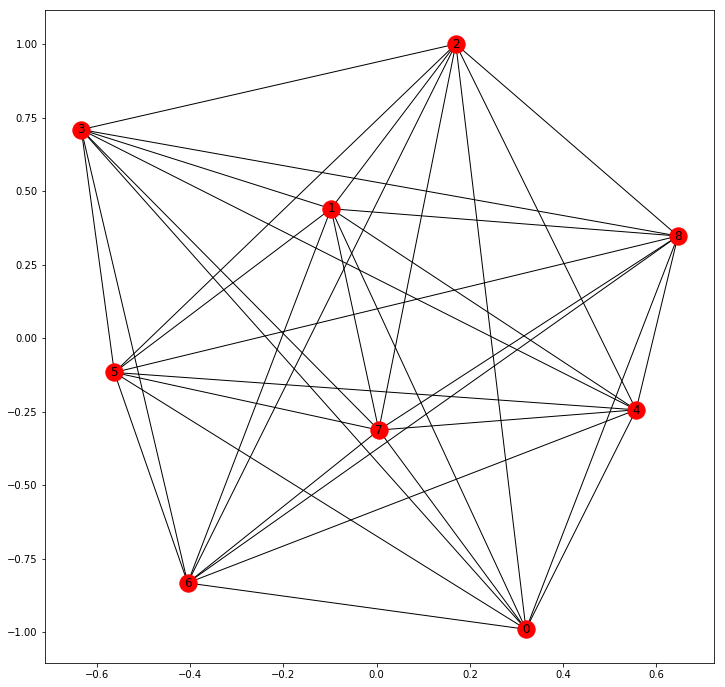

In [42]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(nx_graph)

#### PageRank

In [43]:
def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = nx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)
    return keywords_graph

In [44]:
words_graph = get_connect_graph_by_text_rank(" ".join(cut_sents[0]))

In [45]:
plt.rcParams['font.sans-serif'] = ['SimHei']

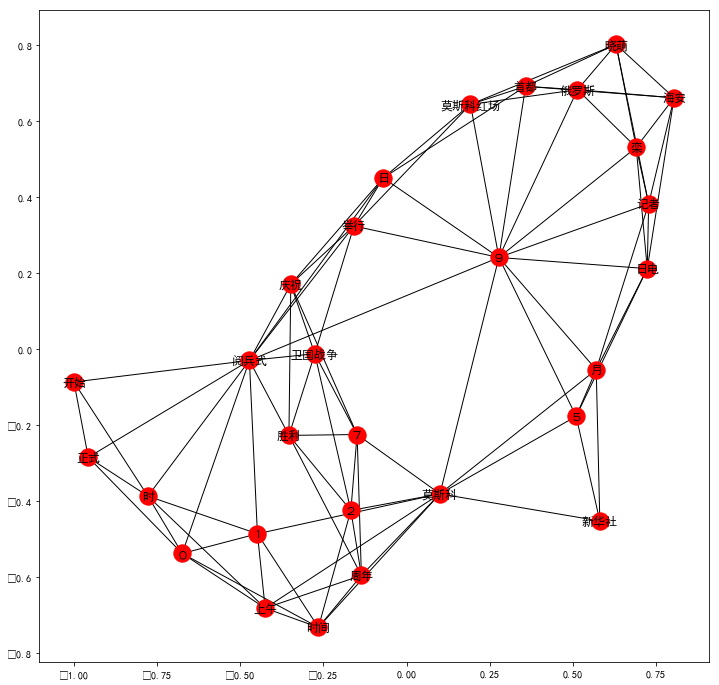

In [46]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(words_graph, font_size=12)

#### 词向量

In [2]:
cutText = '/python/datasource/project/news_cut.txt'
word2vec_file = '/python/datasource/project/news.word2vec'

In [3]:
newsContent = []
with open(cutText, 'r', encoding ='utf8') as f:
    for line in f:
        line = line.strip()
        if not line: continue
        newsContent.append(line)

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
wiki_news = open(cutText, 'r',encoding='utf-8')
model = Word2Vec(LineSentence(wiki_news),sg=0, size=300, window=5,min_count=5, workers=5)
model.save(word2vec_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [13]:
model = Word2Vec.load(word2vec_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [16]:
model.wv.most_similar?

In [35]:
text = model.wv.most_similar('说', topn = 500)

In [37]:
for t, v in text:
    print("'",t,"'", end=', ', sep='')

'表示', '告诉', '认为', '指出', '说完', '坦言', '看来', '称', '明说', '中说', '所说', '介绍', '时说', '透露', '强调', '文说', '写道', '的话', '说道', '建议', '陈说', '说法', '问', '纳说', '地说', '提到', '声称', '称赞', '深有体会', '道', '设想', '直言', '解释', '中称', '相信', '呼吁', '说会', '担心', '写信给', '墨方', '肖凤祥', '深知', '赛义夫', '中国外交部', '兼', '在我看来', '证实', '眼中', '资深', '宣称', '清楚', '还称', '回答', '尼说', '说据', '技术主管', '估计', '来说', '十年如一日', '说出', '承认', '觉得', '知道', '形容', '郑继永说', '罗说', '特别强调', '拉玛', '毫不讳言', '感谢', '坚信', '提及', '非常重视', '战火纷飞', '副', '谈到', '申明', '感慨', '秦晓雯', '为什么', '普遍认为', '拼命三郎', '表明', '镐', '主管', '看法', '援引', '供词', '丹说', '知晓', '首席', '看出', '流利地', '感兴趣', '看到', '基说', '丁说', '批评', '说明', '伊玛', '想法', '曼说', '推文称', '表示感谢', '描述', '重申', '得知', '对此', '告诫', '条法司', '要说', '沉得住气', '称该', '光火', '时称', '八面玲珑', '森说', '指责', '人才济济', '坦承', '列举', '李锦说', '肯定', '引用', '并称', '如是说', '正如', '部副', '预料', '舍恩', '确信', '及其', '所指', '滔滔不绝', '敦促', '戴比', '主任', '高级', '八竿子打不着', '表态', '现阶段', '说来', '帮', '海峡两岸关系协会', '而言', '财政司', '办公室', '什说', '首先', '断定', '理解', '供图', '梅利莎', '因斯', '明白', '坚称', '韦达', '提醒'

In [45]:
key_word = ['说','表示', '告诉', '认为', '指出', '坦言', '看来', '称', '介绍',  '透露', '强调',  '写道', '话', '建议',  '问', '提到', '声称', '称赞', '深有体会', '道', '设想', '直言', '解释', '称', '相信', '呼吁', '担心', '写信给', '深知', '在我看来', '证实', '眼中', '资深', '宣称', '清楚', '还称', '回答',  '估计', '来说','承认', '觉得', '特别强调',  '毫不讳言',  '坚信', '提及', '非常重视', '谈到', '申明', '感慨', '普遍认为','表明', '看法', '援引', '供词',  '知晓',  '批评','想法',  '描述', '重申','告诫', '指责',  '坦承','李锦说', '如是说', '敦促', '表态', '断定', '理解', '坚称',  '提醒']

In [46]:
len(key_word)

70

In [62]:
content = news['content']

In [67]:
news_content = []
news_key = []
id = []
for i, t in enumerate(content):
    for k in key_word:
        t = str(t)
        if k in t:
            news_content.append(t)
            news_key.append(k)
            id.append(i)
            break

In [84]:
exact_news_file = '/python/datasource/project/extract_news.csv'

In [71]:
data = pd.DataFrame({'id':id, 'news':news_content, 'key':news_key})
data.to_csv(exact_news_file,encoding = 'utf8')

In [85]:
exact_news = pd.read_csv(exact_news_file, encoding = 'utf8')
exact_news = cut_content.loc[:, ~cut_content.columns.str.contains('^Unnamed')]

for c in exact_news:
    print(c)

content
id
source
